In [18]:
'''
Assumptions

1:Linearity of parameters
2:Mean of Residuals
3:Check for Homoscedasticity
4:Check for Normality of error terms/residuals
5:No autocorrelation of residuals
6:No perfect multicollinearity
7:Other Models for comparison
'''

import pandas as pd 
import seaborn as sns
import os
import matplotlib.pyplot as plt
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
import numpy as np
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats import diagnostic as diag
import statsmodels.api as sm


C:\Users\AASHISH\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


200
DescribeResult(nobs=200, minmax=(-1.7088234692862663, 1.744029255437918), mean=1.2212453270876723e-16, variance=1.0050251256281406, skewness=-0.06932836662244707, kurtosis=-1.2258970752747356)
200
DescribeResult(nobs=200, minmax=(-1.5708681061368763, 1.778300483288375), mean=-4.529709940470639e-16, variance=1.005025125628141, skewness=0.09346684511084659, kurtosis=-1.2589619024872698)
200
DescribeResult(nobs=200, minmax=(-1.3926464877239573, 3.8411707150992718), mean=2.220446049250313e-16, variance=1.0050251256281406, skewness=0.8879959753085489, kurtosis=0.6035268748678901)
R squared:aa 0.9072183330817297


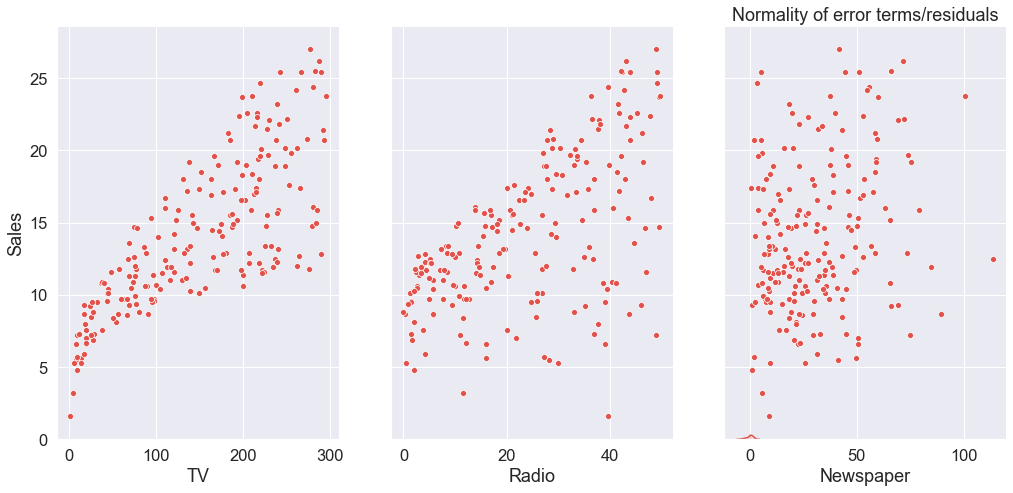

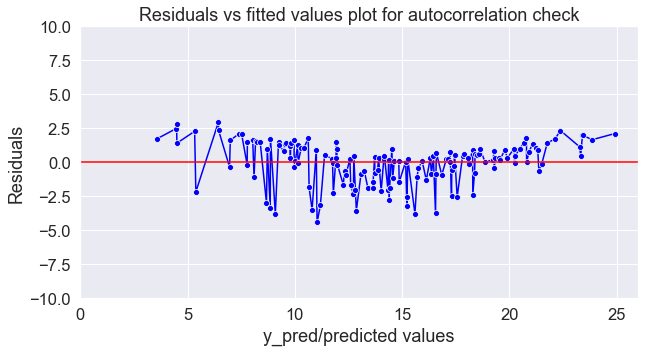

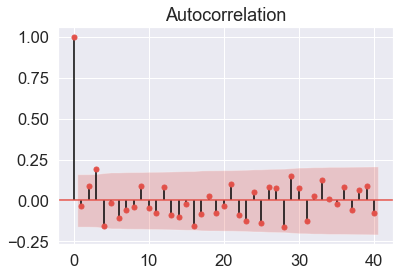



 aashish


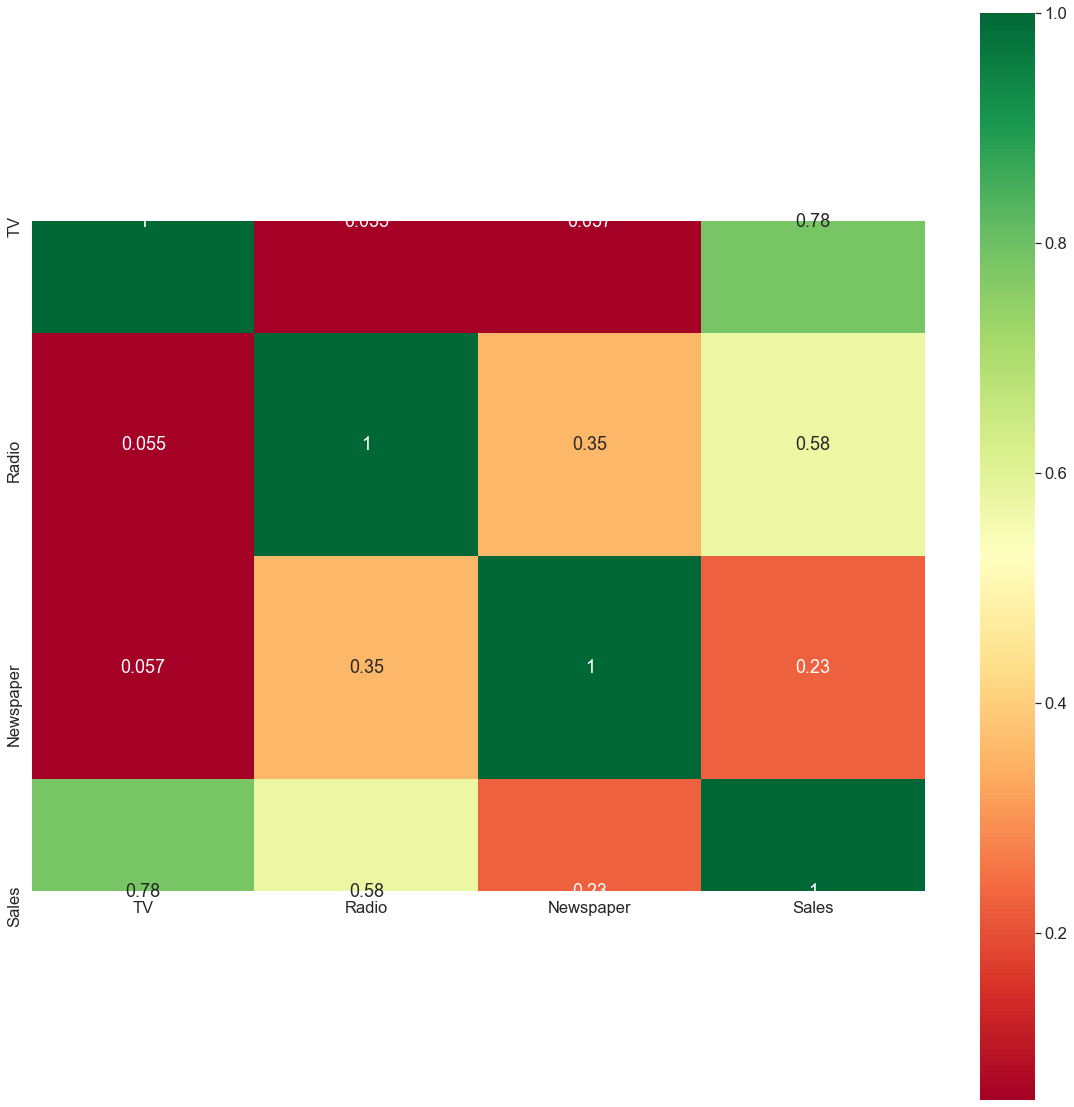

In [30]:
file="datasets_309_669_Advertising.csv"
path="F:\\BIG_DATA_FAMILY"

def File_name_creation(file,path):
    File_Name=os.path.join(path,file)
    return File_Name

def Test_StandardScaler_IS_Successful(data):
    num_cols = len(X[0,:])
    for i in range(num_cols):
        col = X[:,i]
        print(len(col))
        col_stats = ss.describe(col)
        print(col_stats)


def Check_Linear_regression_Assumptions(file,path):

    sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
    data=pd.read_csv(File_Name,index_col='Unnamed: 0')
    p = sns.pairplot(data, y_vars='Sales', x_vars=['TV','Radio','Newspaper'], size=7, aspect=0.7)
    
    x = data.drop(["Sales"],axis=1)
    y = data.Sales
    sc = StandardScaler()
    X = sc.fit_transform(x)
    
    Test_StandardScaler_IS_Successful(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)
    regr = linear_model.LinearRegression()
    regr.fit(X_train,y_train)
    y_pred = regr.predict(X_train)

    print("R squared:aa {}".format(r2_score(y_true=y_train,y_pred=y_pred)))     #1 Accuracy parameter 

    residuals = y_train.values-y_pred
    dataframe_residuals = pd.DataFrame(residuals)
    dataframe_residuals.describe()

    # 3: Using Goldfeld Quandt we test for heteroscedasticity
    name = ['F statistic', 'p-value']
    test = sms.het_goldfeldquandt(residuals, X_train)
    lzip(name, test)

    # 4:Check for Normality of error terms/residuals

    p = sns.distplot(residuals,kde=True)
    p = plt.title('Normality of error terms/residuals')

    # 5 Checking for autocorrelation

    plt.figure(figsize=(10,5))
    p = sns.lineplot(y_pred,residuals,marker='o',color='blue')
    plt.xlabel('y_pred/predicted values')
    plt.ylabel('Residuals')
    plt.ylim(-10,10)
    plt.xlim(0,26)
    p = sns.lineplot([0,26],[0,0],color='red')
    p = plt.title('Residuals vs fitted values plot for autocorrelation check')

    min(diag.acorr_ljungbox(residuals , lags = 40)[1])

    # autocorrelation
    sm.graphics.tsa.plot_acf(residuals, lags=40)
    plt.show()

    # Multi Colinearity

    plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
    p=sns.heatmap(data.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap

    
Check_Linear_regression_Assumptions(file,path)

print("\n\n aashish")